# Dogs vs Cats

## Setup

In [12]:
import os, shutil
import matplotlib.pyplot as plt

IMAGE_SIZE = 150
CAT_FILENAME_PATTERN = 'cat.{}.jpg'
DOG_FILENAME_PATTERN = 'dog.{}.jpg'

orig_data_dir = '/tmp/data/kaggle/dogs-vs-cats/train'

base_dir = '/tmp/data/kaggle/dogs-vs-cats/small'
os.makedirs(base_dir, exist_ok=True)

models_dir = os.path.join(base_dir, 'models')
os.makedirs(models_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
valid_dir = os.path.join(base_dir, 'validation')
os.makedirs(valid_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)
valid_dogs_dir = os.path.join(valid_dir, 'dogs')
os.makedirs(valid_dogs_dir, exist_ok=True)
valid_cats_dir = os.path.join(valid_dir, 'cats')
os.makedirs(valid_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)


def copy_files(src_dir, dst_dir, start_index, end_index, dogs_or_cats):
    if dogs_or_cats == 'dogs':
        pattern = DOG_FILENAME_PATTERN
    elif dogs_or_cats == 'cats':
        pattern = CAT_FILENAME_PATTERN
    else:
        raise ValueError('dogs_or_cats should be either "dogs" or "cats". Received ' + dogs_or_cats)

    for i in range(start_index, end_index):
        filename = pattern.format(i)
        src = os.path.join(src_dir, filename)
        dst = os.path.join(dst_dir, filename)
        shutil.copyfile(src, dst)

def plot_history(history):
    hist_dict = history.history
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']
    acc_values = hist_dict['acc']
    val_acc_values = hist_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,
                                   sharex='all', figsize=(10, 7))
    ax0.plot(epochs, loss_values, 'bo')
    ax0.plot(epochs, val_loss_values, 'b+')
    ax0.set_ylabel('Loss')

    ax1.plot(epochs, acc_values, 'bo')
    ax1.plot(epochs, val_acc_values, 'b+')
    ax1.set_ylabel('Accuracy')

    plt.show()

In [ ]:
copy_files(orig_data_dir, train_dogs_dir, 0, 1000, dogs_or_cats='dogs')
copy_files(orig_data_dir, valid_dogs_dir, 1000, 1500, dogs_or_cats='dogs')
copy_files(orig_data_dir, test_dogs_dir, 1500, 2000, dogs_or_cats='dogs')
copy_files(orig_data_dir, train_cats_dir, 0, 1000, dogs_or_cats='cats')
copy_files(orig_data_dir, valid_cats_dir, 1000, 1500, dogs_or_cats='cats')
copy_files(orig_data_dir, test_cats_dir, 1500, 2000, dogs_or_cats='cats')

## Build and train ConvNet model

In [1]:
from keras import layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras import models
from keras import activations
from keras.activations import relu, sigmoid
from keras import losses
from keras import regularizers
from keras import optimizers

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(units=512, activation=relu))
model.add(Dense(units=1, activation=sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=['acc'])

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1.0/255)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

valid_generator = test_data_gen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=25
)

Epoch 1/10
100/100 [==============================] - 137s - loss: 0.7171 - acc: 0.5145 - val_loss: 0.6796 - val_acc: 0.4880
Epoch 2/10
100/100 [==============================] - 133s - loss: 0.6860 - acc: 0.5430 - val_loss: 0.6297 - val_acc: 0.6260
Epoch 3/10
100/100 [==============================] - 131s - loss: 0.6470 - acc: 0.6415 - val_loss: 0.6705 - val_acc: 0.5840
Epoch 4/10
100/100 [==============================] - 128s - loss: 0.5978 - acc: 0.6840 - val_loss: 0.5693 - val_acc: 0.7040
Epoch 5/10
100/100 [==============================] - 126s - loss: 0.5656 - acc: 0.7260 - val_loss: 0.8267 - val_acc: 0.5840
Epoch 6/10
100/100 [==============================] - 128s - loss: 0.5390 - acc: 0.7330 - val_loss: 0.6999 - val_acc: 0.6580
Epoch 7/10
100/100 [==============================] - 135s - loss: 0.5117 - acc: 0.7510 - val_loss: 0.5778 - val_acc: 0.7300
Epoch 8/10
100/100 [==============================] - 131s - loss: 0.4629 - acc: 0.7935 - val_loss: 0.5826 - val_acc: 0.7400


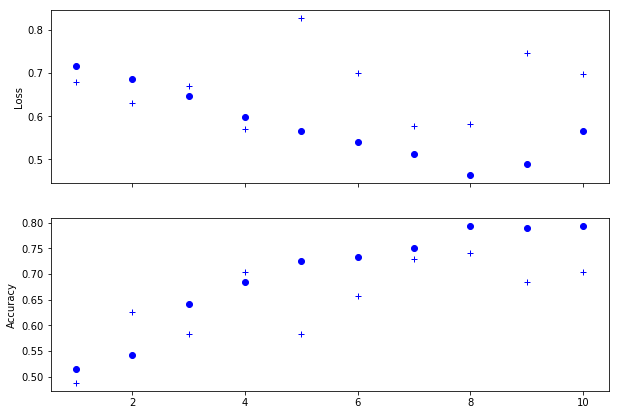

In [6]:
plot_history(history)

In [10]:
model.save(os.path.join(models_dir, 'cat_vs_dogs_small_1.h5'))

## Data augmentation

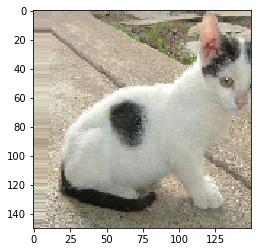

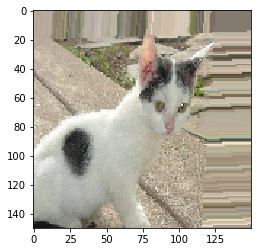

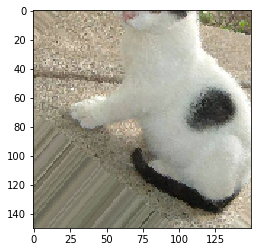

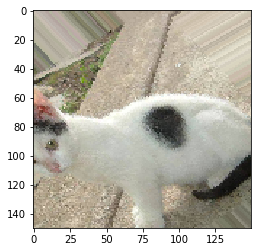

In [13]:
data_gen = ImageDataGenerator(
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# test transformation

file_path = os.path.join(train_cats_dir, CAT_FILENAME_PATTERN.format(3))
img = image.load_img(file_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_data = image.img_to_array(img)
img_data = img_data.reshape((1, IMAGE_SIZE, IMAGE_SIZE, 3))

i = 0
for batch in data_gen.flow(img_data, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

plt.imshow(img)

## Train model on augmented data

In [40]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
# model.add(layers.Dropout(0.5))
model.add(Dense(units=512, activation=relu))
model.add(Dense(units=1, activation=sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=['acc'])

train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',
    batch_size=20
)

valid_generator = test_data_gen.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',
    batch_size=20
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=25
)

Epoch 1/10
100/100 [==============================] - 135s - loss: 0.7521 - acc: 0.5150 - val_loss: 0.6869 - val_acc: 0.5060
Epoch 2/10
100/100 [==============================] - 131s - loss: 0.6999 - acc: 0.5330 - val_loss: 0.6905 - val_acc: 0.5120
Epoch 3/10
100/100 [==============================] - 131s - loss: 0.6976 - acc: 0.5590 - val_loss: 0.6656 - val_acc: 0.5680
Epoch 4/10
100/100 [==============================] - 133s - loss: 0.7042 - acc: 0.5950 - val_loss: 0.6396 - val_acc: 0.6620
Epoch 5/10
100/100 [==============================] - 131s - loss: 0.6915 - acc: 0.6040 - val_loss: 0.6023 - val_acc: 0.6480
Epoch 6/10
100/100 [==============================] - 132s - loss: 0.6606 - acc: 0.6165 - val_loss: 0.5985 - val_acc: 0.6700
Epoch 7/10
100/100 [==============================] - 132s - loss: 0.6408 - acc: 0.6520 - val_loss: 0.5975 - val_acc: 0.6760
Epoch 8/10
100/100 [==============================] - 133s - loss: 2.7041 - acc: 0.5880 - val_loss: 7.7480 - val_acc: 0.5140


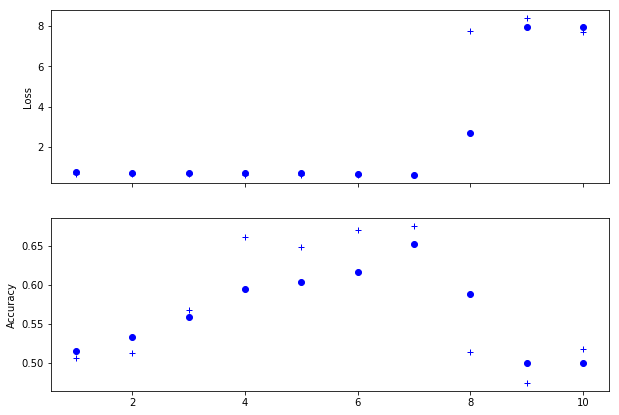

In [42]:
plot_history(history)

In [ ]:
model.save(os.path.join(models_dir, 'cat_vs_dogs_small_2_aug.h5'))

Try decrease the destructivity of image generator. Seems like classifier has a hard time predicting modified images.

## Finetune

Found 2000 images belonging to 2 classes.
[ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  1.]


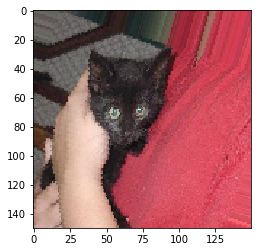

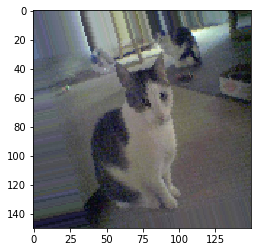

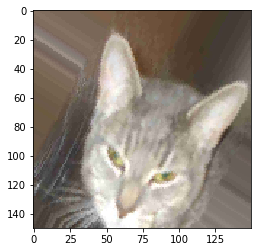

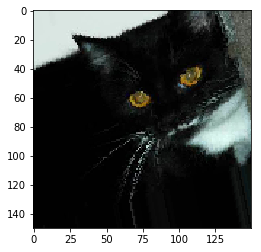

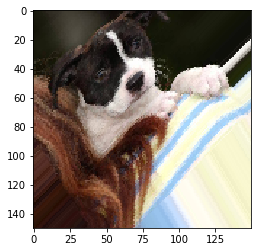

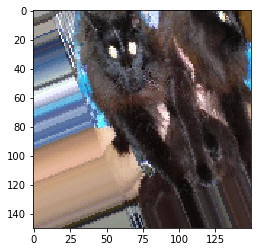

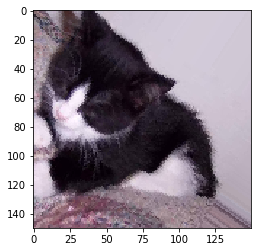

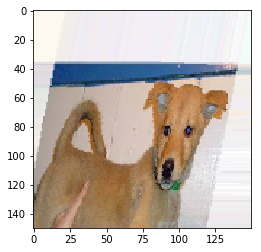

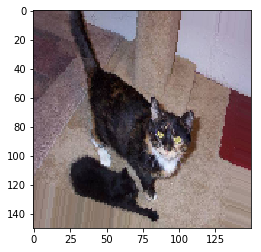

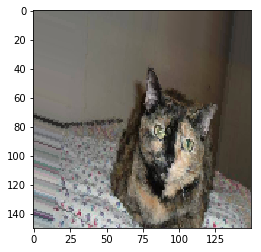

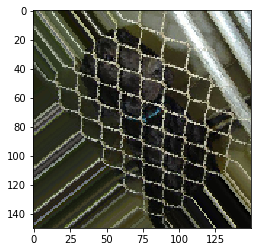

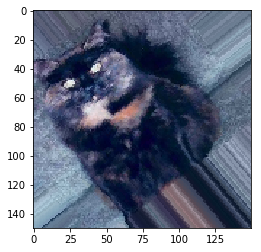

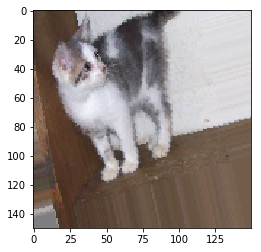

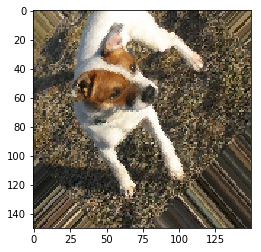

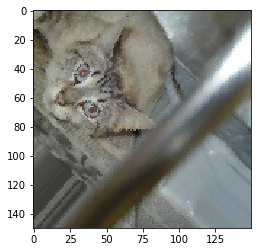

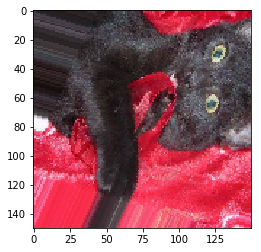

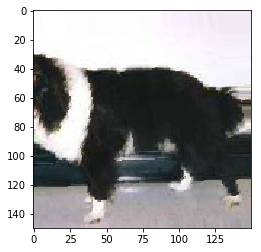

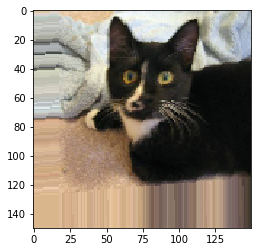

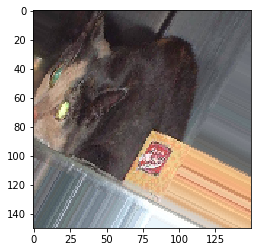

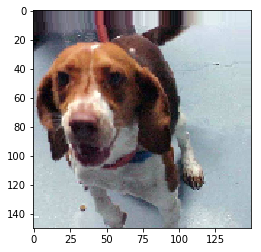

In [39]:

train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',
    batch_size=20
)

i = 0
it = iter(train_generator)
(batch, labels) = next(it)
print(labels)
for img in batch:
    plt.figure(i)
    plt.imshow(image.array_to_img(img))
    i += 1
plt.show()